Tutorial for [writing csv in Python](https://www.pythontutorial.net/python-basics/python-write-csv-file/)

Useful information on [pathlib](https://www.atqed.com/python-current-path)

In [1]:
import numpy as np
import pandas as pd

import pathlib
import IPython.display as display
from PIL import Image

import csv

---

### File Path Construction

In [2]:
home_path = str(pathlib.Path.home())
# get current working directory
cwd = pathlib.Path.cwd()

# build complete paths for `train_data` and `test_data`
# use `.joinpath()` to ensure operating system conform paths
train_data_dir = cwd.joinpath('data', 'train_images')
test_data_dir = cwd.joinpath('data', 'test_images')

In [3]:
test_data_dir

PosixPath('/Users/michael/neuefische/CapstoneProject_SteelDefectDetection/data/test_images')

In [4]:
# Count number of images in folder
image_count = len(list(train_data_dir.glob('*.jpg')))
print("We have", image_count, "training images.")

We have 12568 training images.


In [5]:
# print out first 2 elements via UNIX commands
!head -3 data/train.csv > /tmp/input.csv 
!cat /tmp/input.csv

ImageId,ClassId,EncodedPixels
0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 30370 24 30626 24 30882 24 31139 23 31395 23 31651 23 31907 23 32163 23 32419 23 32675 23 77918 27 78174 55 78429 60 78685 64 78941 68 79197 72 79452 77 79708 81 79964 85 80220 89 80475 94 80731 98 80987 102 81242 105 81498 105 81754 104 82010 104 82265 105 82521 31 82556 69 82779 27 82818 63 83038 22 83080 57 83297 17 83342 50 83555 13 83604 44 83814 8 83866 37 84073 3 84128 31 84390 25 84652 18 84918 8 85239 10 85476 29 85714 47 85960 57 86216 57 86471 58 86727 58 86983 58 87238 59 87494 59 87750 59 88005 60 88261 60 88517 60 88772 61 89028 53 89283 40 89539 32 89667 10 89795 30 89923 28 90050 29 90179 37 90306 27 90434 38 90562 14 90690 38 90817 9 90946 38 91073 3 91202 38 91458 38 91714 38 91969 39 92225 39 92481 39 92737 39 92993 39 93248 40 93504 40 93760 40 94026 30 94302 10 189792 7 190034 21 190283 28 190539 28 190795 28 191051 28 191307 28 191563 28 191819 28 192075 28 192331 28 192587 

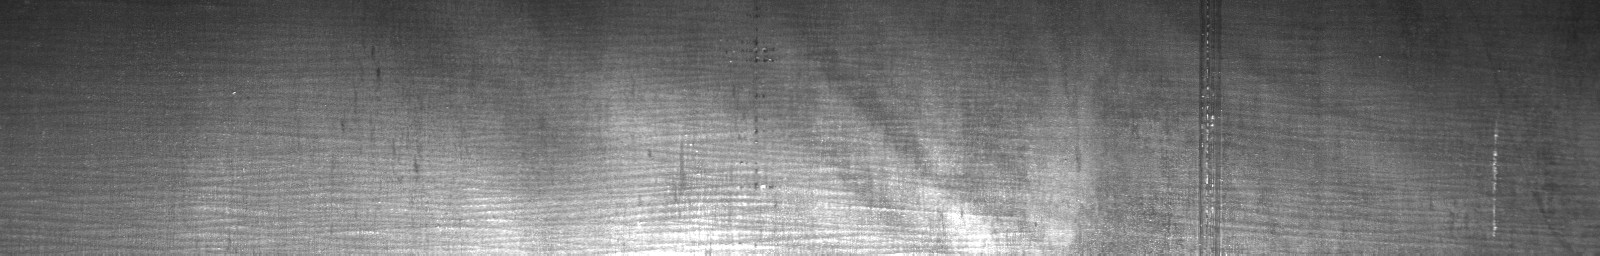

/Users/michael/neuefische/CapstoneProject_SteelDefectDetection/data/train_images/58ee62fd7.jpg


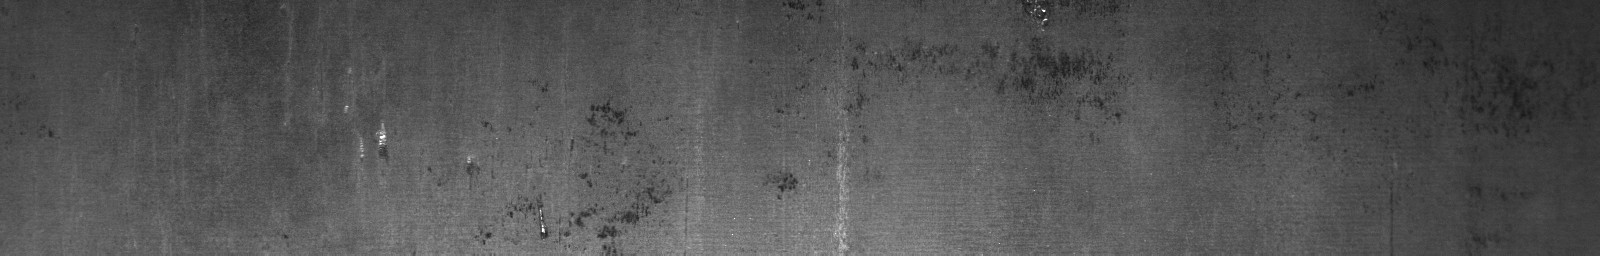

/Users/michael/neuefische/CapstoneProject_SteelDefectDetection/data/train_images/eeffa4c49.jpg


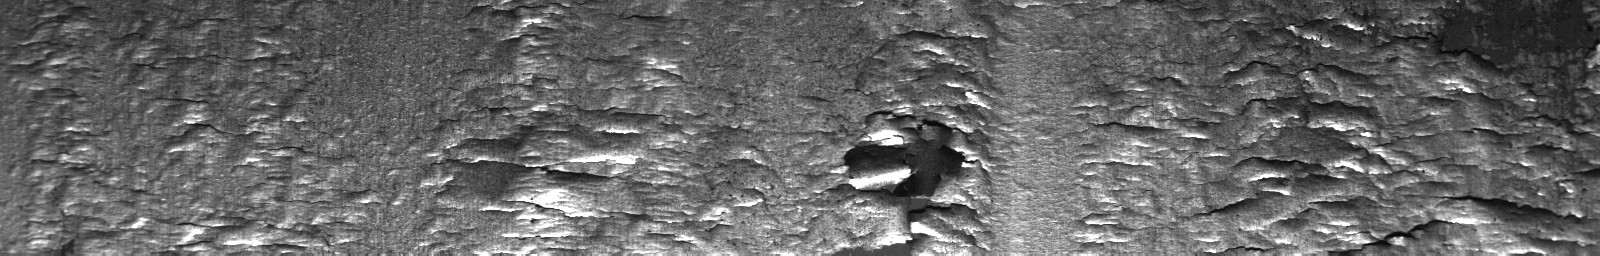

/Users/michael/neuefische/CapstoneProject_SteelDefectDetection/data/train_images/0dced41aa.jpg


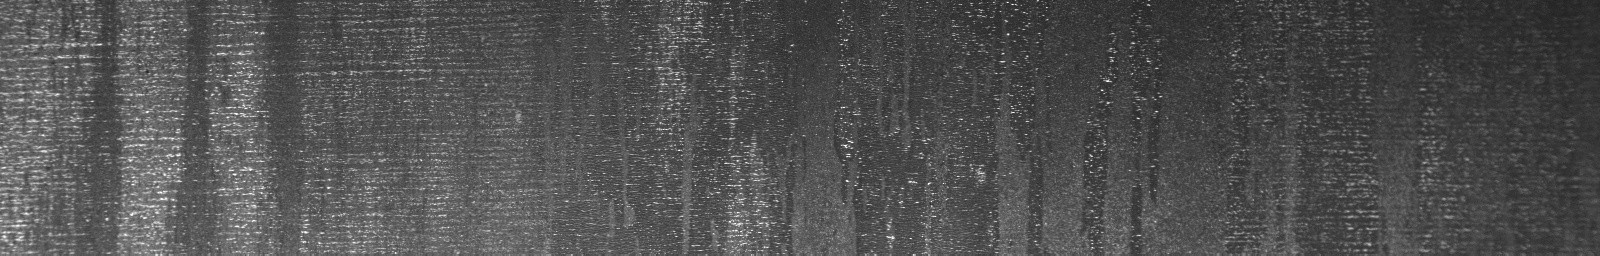

/Users/michael/neuefische/CapstoneProject_SteelDefectDetection/data/train_images/bd2366c49.jpg


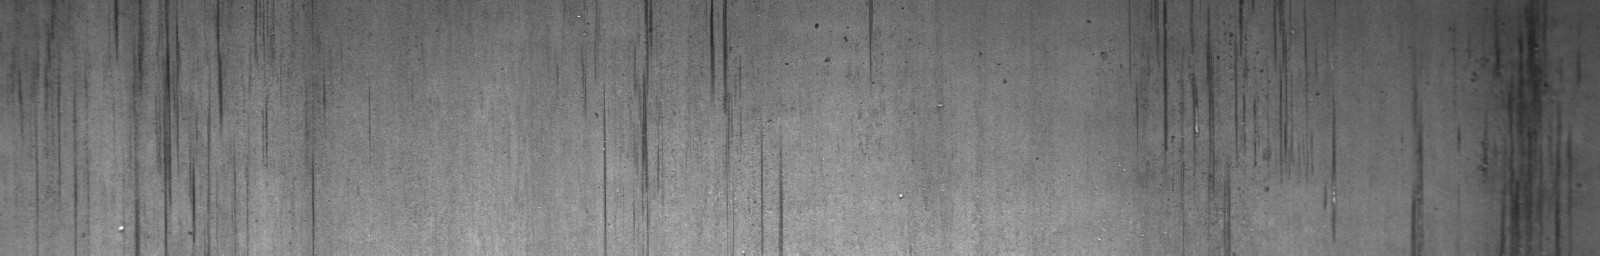

/Users/michael/neuefische/CapstoneProject_SteelDefectDetection/data/train_images/e2bdd4236.jpg


In [6]:
# Display a few images
images = list(train_data_dir.glob('*.jpg'))

for image in images[:5]:
    display.display(Image.open(str(image)))
    print(image.as_posix())

For our complete csv-file we will first extract all `ImageIds` from `train.csv`. Since there are images with more than one defect, and, hence, more than 1 line in `train.csv`, we will concat the missing image IDs to `train.csv`. To obtain the missing IDs, we construct a complete list of all images, eliminate all lines with `ImageIds` from `train.csv` and then concatenate.

---

### Prepare train.csv

In [7]:
df_defects = pd.read_csv('data/train.csv')
# create image paths for 
defect_paths = df_defects.ImageId.apply(lambda x: train_data_dir.parent.joinpath(x))
# add column to the left of the data frame
df_defects = pd.concat([pd.Series(defect_paths, name='FilePath'), df_defects], axis = 1)
df_defects.head()

,FilePath,ImageId,ClassId,EncodedPixels
0,/Users/michael/neuefische/CapstoneProject_Stee...,0002cc93b.jpg,1,29102 12 29346 24 29602 24 29858 24 30114 24 3...
1,/Users/michael/neuefische/CapstoneProject_Stee...,0007a71bf.jpg,3,18661 28 18863 82 19091 110 19347 110 19603 11...
2,/Users/michael/neuefische/CapstoneProject_Stee...,000a4bcdd.jpg,1,37607 3 37858 8 38108 14 38359 20 38610 25 388...
3,/Users/michael/neuefische/CapstoneProject_Stee...,000f6bf48.jpg,4,131973 1 132228 4 132483 6 132738 8 132993 11 ...
4,/Users/michael/neuefische/CapstoneProject_Stee...,0014fce06.jpg,3,229501 11 229741 33 229981 55 230221 77 230468...


In [8]:
# isolate `ImageIds` for images with defect
defect_ids = df_defects.ImageId.unique()

---

### Building the CSV-File

Create a csv file with all image paths, the respective `ImageId` and an initialisation for `ClassId` and `EncodedPixels`.

In [9]:
header = ['FilePath', 'ImageId', 'ClassId', 'EncodedPixels']

rows = []

for image in images:
    # `.as_posix()` returns the complete path
    # `.name` returns the image name
    # set `ClassId` and `EncodedPixels` to 0
    rows.append([image.as_posix(), image.name, 0, '0'])
    
with open(train_data_dir.parent.joinpath('train_raw.csv'), # `.parent` returns the path up to the data directory
          'w', 
          encoding = 'UTF8',
          newline = '' # avoid blank lines between rows
         ) as f:
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(rows) # write row into file

In [10]:
df_raw = pd.read_csv('data/train_raw.csv')

# get indices of `df_raw` for row dropping
indices = []
for idx, row in df_raw.iterrows():
    if row.ImageId in defect_ids:
        indices.append(idx)

In [11]:
# check wether all indices or defected images are caught
len(indices)

6666

In [12]:
df_raw.drop(indices, inplace=True)
df_raw

,FilePath,ImageId,ClassId,EncodedPixels
2,/Users/michael/neuefische/CapstoneProject_Stee...,0dced41aa.jpg,0,0
3,/Users/michael/neuefische/CapstoneProject_Stee...,bd2366c49.jpg,0,0
6,/Users/michael/neuefische/CapstoneProject_Stee...,18076ccc9.jpg,0,0
7,/Users/michael/neuefische/CapstoneProject_Stee...,b3f6a891f.jpg,0,0
10,/Users/michael/neuefische/CapstoneProject_Stee...,16730239e.jpg,0,0
...,...,...,...,...
12560,/Users/michael/neuefische/CapstoneProject_Stee...,fcc7c9c3c.jpg,0,0
12561,/Users/michael/neuefische/CapstoneProject_Stee...,d81c1025c.jpg,0,0
12562,/Users/michael/neuefische/CapstoneProject_Stee...,ea56440ac.jpg,0,0
12563,/Users/michael/neuefische/CapstoneProject_Stee...,cc00b69e7.jpg,0,0


In [13]:
# add all rows of unclassified images to the defected images
df_complete = pd.concat([df_defects, df_raw], axis=0, ignore_index=True)
df_complete['Defect'] = df_complete.ClassId.apply(lambda x: 1 if x > 0 else 0)
df_complete.to_csv('data/train_complete.csv', sep=',', index=False)

In [14]:
# eliminate unused csv file
!rm -f data/train_raw.csv